KNN MEDICAL IMAGE CLASSIFICATION - COMPLETE IMPLEMENTATION
Start Time: 2025-10-26 11:06:31
Algorithm: K-Nearest Neighbors (KNN)
Approach: Hand-crafted Features + Instance-based Learning
Random Seed: 42

 Configuration:
   Image Size: 32×32×3
   Feature Methods: HOG + LBP + Statistical
   KNN Parameters:
      - K (Neighbors): 5
      - Distance Metric: euclidean
      - Weight Function: distance
   Subset: 10.0% (for fast execution)

TASK 2: DATA LOADING AND ANALYSIS

Technique: Data loading and exploratory analysis
   - Load CSV manifests
   - Analyze class distribution
   - Apply stratified subset sampling

 Original Dataset:
   Training:   34,561 samples
   Validation: 6,491 samples
   Test:       17,778 samples

 Speed Optimization: Using 10.0% subset
   Training:   3,456 samples
   Validation: 649 samples

 Class Distribution:
   Class 0:  206 samples ( 5.96%)
   Class 1:  133 samples ( 3.85%)
   Class 2:  122 samples ( 3.53%)
   Class 3:  163 samples ( 4.72%)
   Class 4:  409 sam

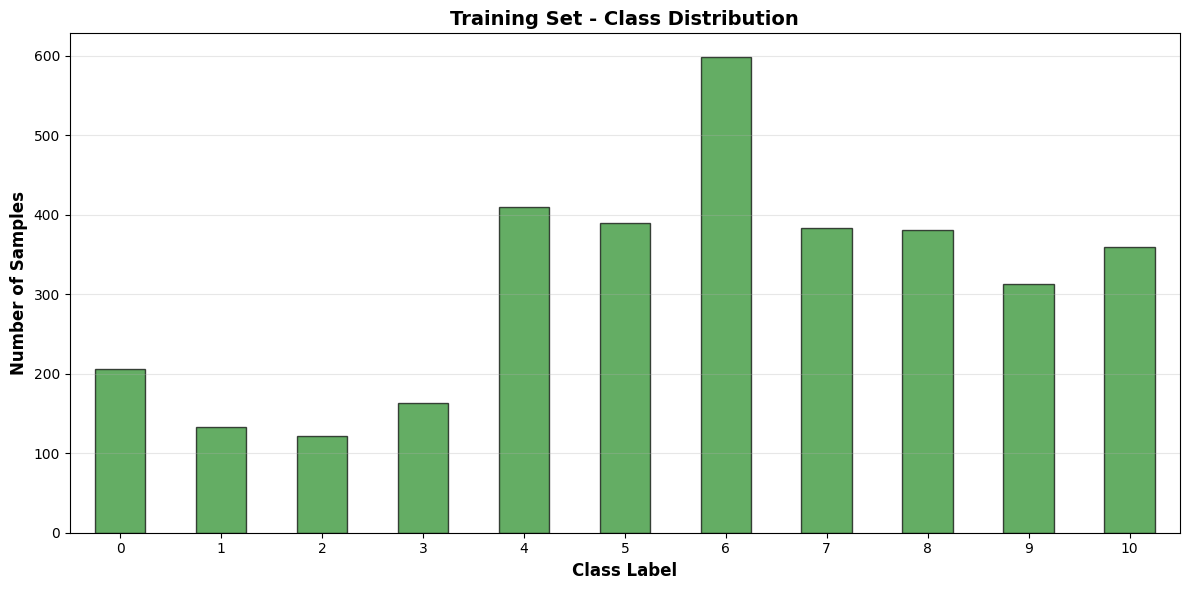


 Task 2 Complete
   Dataset Split: 3456/649/17778

TASK 3: FEATURE EXTRACTION METHODS

Technique: Multi-scale feature extraction
   Features Used:
   1. HOG (Histogram of Oriented Gradients)
      - Orientations: 8
      - Pixels per cell: (8, 8)
      - Cells per block: (2, 2)
   2. LBP (Local Binary Patterns)
      - Radius: 2
      - Points: 16
      - Method: uniform
   3. Statistical Features
      - Mean, Std, Median, Min, Max
      - Percentiles (25th, 75th)
      - Skewness, Kurtosis

 Feature Extraction Configuration:
   Total Feature Dimension: 315
   Breakdown:
      - HOG Features: 72
      - LBP Features: 235
      - Statistical Features: 8

 Task 3 Complete

TASK 4: EXTRACT TRAINING FEATURES

Technique: Batch feature extraction with caching

 Training 3456 images...


Training: 100%|██████████| 3456/3456 [00:41<00:00, 82.32it/s] 



 Training Features Extracted:
   Shape: (3456, 531)
   Time: 42.00s (12.15ms per image)
   Feature Statistics:
      Mean: 0.0874
      Std:  0.1198
      Min:  -3.5018
      Max:  7.1391

 Task 4 Complete

TASK 5: EXTRACT VALIDATION FEATURES

 Validation 649 images...


Validation: 100%|██████████| 649/649 [00:12<00:00, 53.43it/s]



 Validation Features Extracted:
   Shape: (649, 531)
   Time: 12.16s (18.73ms per image)

 Task 5 Complete

TASK 6: FEATURE SCALING

Technique: Z-score Normalization (StandardScaler)
   Formula: z = (x - μ) / σ
   Where: μ = mean, σ = standard deviation
   Purpose: Normalize features to same scale for distance-based KNN

 Features Scaled:
   Training - Mean: -0.000000, Std: 0.768984
   Validation - Mean: -0.009387, Std: 0.760972

 Scaler saved: scaler.pkl

 Task 6 Complete

TASK 7: TRAIN KNN CLASSIFIER

Technique: K-Nearest Neighbors (KNN)
   Algorithm: Instance-based learning
   Principle: Classify based on K nearest training examples
   Parameters:
      K (n_neighbors): 5
      Distance Metric: euclidean
      Weights: distance
      Algorithm: auto

   Distance Function (Euclidean):
      d(x, y) = √(Σ(x_i - y_i)²)

   Prediction: Majority vote of K nearest neighbors
      ŷ = mode(y₁, y₂, ..., y_k)

 Training KNN model...

 KNN Model Trained:
   Training Time: 0.00s
   Training S

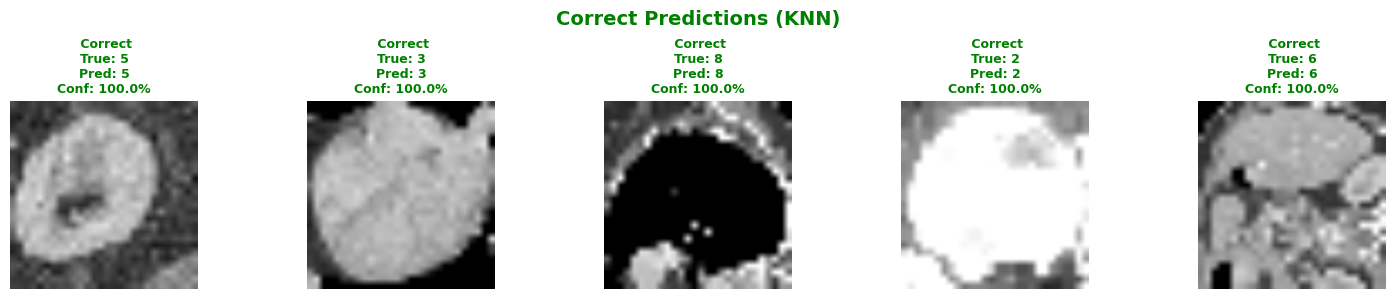

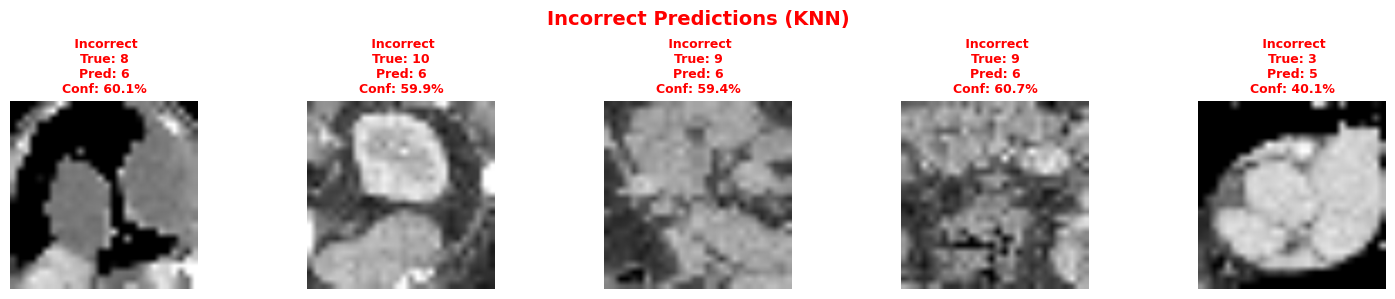


 Task 9 Complete

TASK 10: CONFUSION MATRIX ANALYSIS


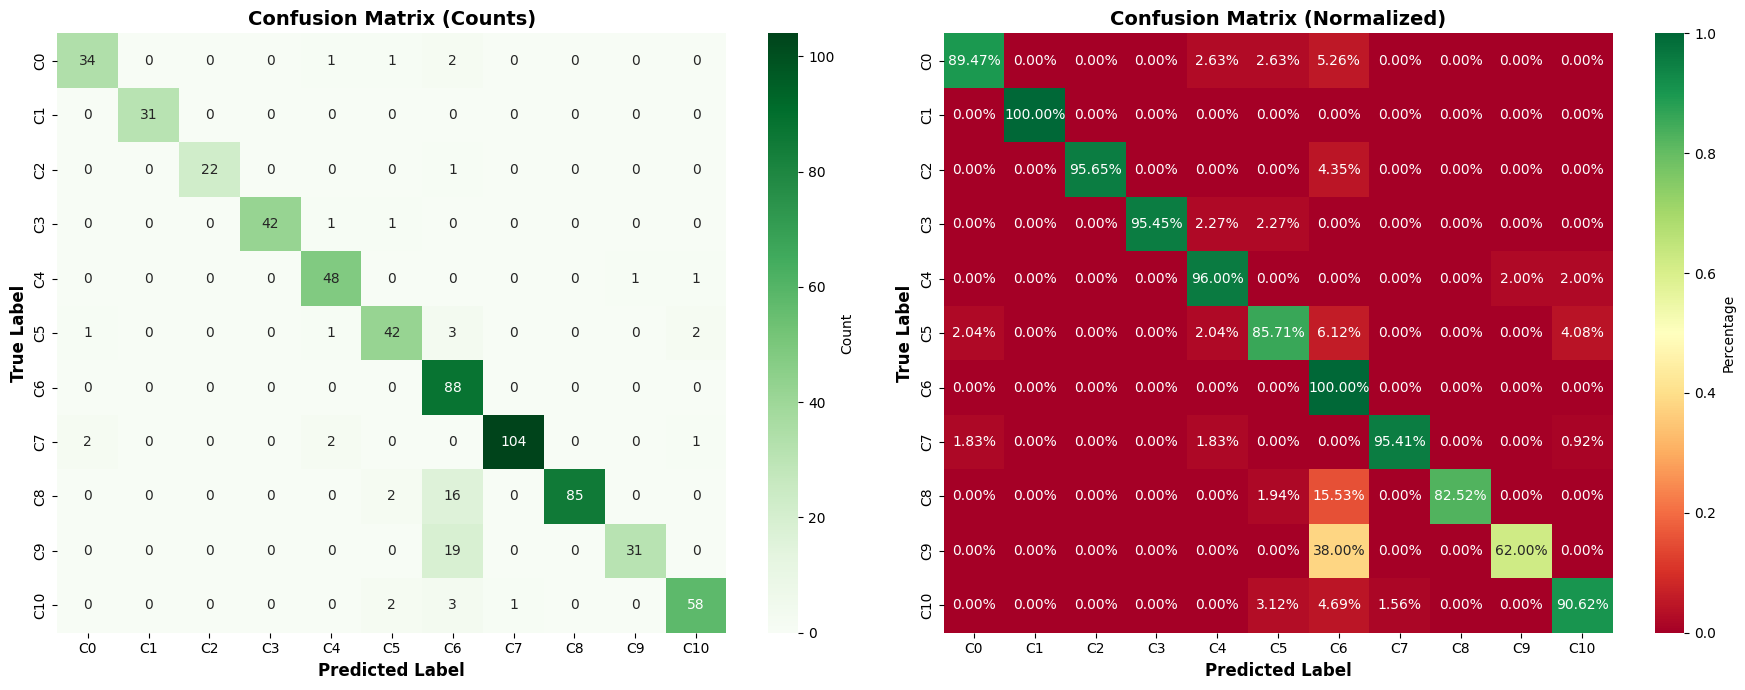


 Confusion Analysis:
   Top 5 Misclassifications:
      1. Class 9 → 6: 19 samples
      2. Class 8 → 6: 16 samples
      3. Class 5 → 6: 3 samples
      4. Class 10 → 6: 3 samples
      5. Class 0 → 6: 2 samples

 Task 10 Complete

TASK 11: ROC CURVE ANALYSIS


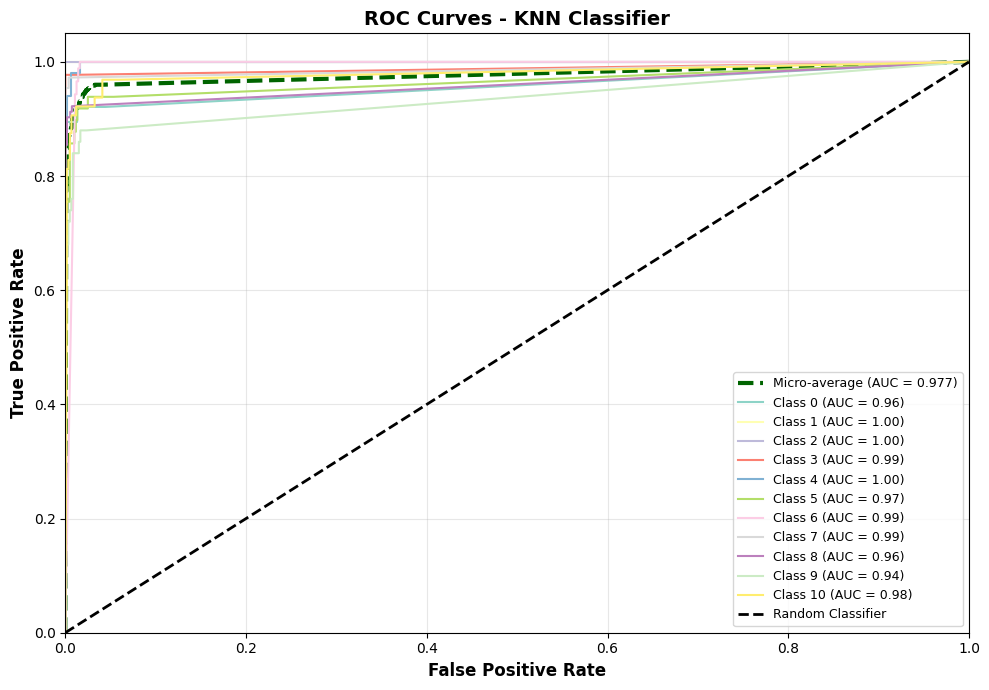


 AUC Scores:
   Micro-average AUC: 0.9774
   Class 0: 0.9584
   Class 1: 1.0000
   Class 2: 1.0000
   Class 3: 0.9885
   Class 4: 0.9993
   Class 5: 0.9660
   Class 6: 0.9941
   Class 7: 0.9861
   Class 8: 0.9607
   Class 9: 0.9369
   Class 10: 0.9800

 Task 11 Complete

TASK 12: TEST SET PREDICTIONS

 Processing test set (17778 samples)...

 Test 17778 images...


Test: 100%|██████████| 17778/17778 [08:05<00:00, 36.63it/s] 



 Test Predictions Complete:
   Feature Extraction: 485.40s
   Prediction Time: 1.14s
   Total Samples: 17,778
   Average Confidence: 0.7749
   Predictions saved: test_predictions.csv

 Test Predictions Distribution:
   Class 0: 1,439 predictions ( 8.09%)
   Class 1:  560 predictions ( 3.15%)
   Class 2:  447 predictions ( 2.51%)
   Class 3:  508 predictions ( 2.86%)
   Class 4: 1,727 predictions ( 9.71%)
   Class 5: 1,330 predictions ( 7.48%)
   Class 6: 4,984 predictions (28.03%)
   Class 7: 1,606 predictions ( 9.03%)
   Class 8: 1,532 predictions ( 8.62%)
   Class 9: 1,888 predictions (10.62%)
   Class 10: 1,757 predictions ( 9.88%)

 Task 12 Complete

 KNN CLASSIFICATION COMPLETED SUCCESSFULLY!

 Complete Summary:
   Total Execution Time: 9.54 minutes
   Feature Extraction: 54.16s
   Model Training: 0.00s
   Final Accuracy: 90.14%
   Feature Dimension: 315
   Test Predictions: 17,778

 All Results: ./results_knn_complete/

 Generated Files:
   1. knn_summary.json - Complete impleme

In [ ]:
"""
=============================================================================
K-NEAREST NEIGHBORS (KNN) - MEDICAL IMAGE CLASSIFICATION
=============================================================================

=============================================================================
"""

# =============================================================================
# TASK 1: SETUP AND IMPORTS

# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import warnings
import time
from datetime import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# Feature Extraction
from skimage.feature import hog, local_binary_pattern
from scipy import stats
import cv2
from PIL import Image

# Model persistence
import joblib
# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

start_time_total = time.time()

print("="*80)
print("KNN MEDICAL IMAGE CLASSIFICATION - COMPLETE IMPLEMENTATION")
print("="*80)
print(f"Start Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Algorithm: K-Nearest Neighbors (KNN)")
print(f"Approach: Hand-crafted Features + Instance-based Learning")
print(f"Random Seed: {RANDOM_SEED}")
print("="*80)


# CONFIGURATION


class Config:
    """Configuration optimized for ~10 minutes execution"""
    
    # === FILE PATHS ===
    TRAIN_CSV = 'labels_train.csv'
    VAL_CSV = 'labels_val.csv'
    TEST_CSV = 'manifest_public.csv'
    
    TRAIN_IMAGE_DIR = 'images_train/'
    VAL_IMAGE_DIR = 'images_val/'
    TEST_IMAGE_DIR = 'images/'
    
    RESULTS_DIR = './results_knn_complete/'
    MODEL_SAVE_PATH = 'knn_model.pkl'
    SCALER_SAVE_PATH = 'scaler.pkl'
    
    # === DATASET PARAMETERS ===
    NUM_CLASSES = 11
    USE_SUBSET = True
    SUBSET_FRACTION = 0.10  # 10% for fast execution (~10 min)
    
    # === IMAGE PARAMETERS ===
    IMG_HEIGHT = 32
    IMG_WIDTH = 32
    IMG_CHANNELS = 3
    
    # === FEATURE EXTRACTION PARAMETERS ===
    USE_HOG_FEATURES = True
    USE_LBP_FEATURES = True
    USE_STATISTICAL_FEATURES = True
    
    # HOG parameters (optimized for speed and accuracy)
    HOG_ORIENTATIONS = 8
    HOG_PIXELS_PER_CELL = (8, 8)
    HOG_CELLS_PER_BLOCK = (2, 2)
    
    # LBP parameters
    LBP_RADIUS = 2
    LBP_N_POINTS = 16  # 8 * 2
    LBP_METHOD = 'uniform'
    
    # === KNN PARAMETERS ===
    N_NEIGHBORS = 5           # K value (can tune: 3, 5, 7, 9)
    WEIGHTS = 'distance'      # Weight function: 'uniform' or 'distance'
    METRIC = 'euclidean'      # Distance metric: 'euclidean', 'manhattan', 'minkowski'
    ALGORITHM = 'auto'        # Algorithm: 'auto', 'ball_tree', 'kd_tree', 'brute'
    
    CLASS_NAMES = {
        0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3',
        4: 'Class 4', 5: 'Class 5', 6: 'Class 6', 7: 'Class 7',
        8: 'Class 8', 9: 'Class 9', 10: 'Class 10'
    }

config = Config()
os.makedirs(config.RESULTS_DIR, exist_ok=True)

print(f"\n Configuration:")
print(f"   Image Size: {config.IMG_WIDTH}×{config.IMG_HEIGHT}×{config.IMG_CHANNELS}")
print(f"   Feature Methods: HOG + LBP + Statistical")
print(f"   KNN Parameters:")
print(f"      - K (Neighbors): {config.N_NEIGHBORS}")
print(f"      - Distance Metric: {config.METRIC}")
print(f"      - Weight Function: {config.WEIGHTS}")
print(f"   Subset: {config.SUBSET_FRACTION*100}% (for fast execution)")


# TASK 2: DATA LOADING AND ANALYSIS

# Input: CSV files with image paths and labels
# Output: Loaded dataframes with class distribution analysis
# Technique: Pandas DataFrame operations with stratified sampling


print("\n" + "="*80)
print("TASK 2: DATA LOADING AND ANALYSIS")
print("="*80)

print("\nTechnique: Data loading and exploratory analysis")
print("   - Load CSV manifests")
print("   - Analyze class distribution")
print("   - Apply stratified subset sampling")

# Load CSV files
train_df = pd.read_csv(config.TRAIN_CSV)
val_df = pd.read_csv(config.VAL_CSV)
test_df = pd.read_csv(config.TEST_CSV)

print(f"\n Original Dataset:")
print(f"   Training:   {len(train_df):,} samples")
print(f"   Validation: {len(val_df):,} samples")
print(f"   Test:       {len(test_df):,} samples")

# Apply subset for speed
if config.USE_SUBSET:
    print(f"\n Speed Optimization: Using {config.SUBSET_FRACTION*100}% subset")
    train_df = train_df.sample(frac=config.SUBSET_FRACTION, random_state=RANDOM_SEED)
    val_df = val_df.sample(frac=config.SUBSET_FRACTION, random_state=RANDOM_SEED)
    print(f"   Training:   {len(train_df):,} samples")
    print(f"   Validation: {len(val_df):,} samples")

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Class distribution analysis
print("\n Class Distribution:")
train_class_counts = train_df['label'].value_counts().sort_index()
for cls in range(config.NUM_CLASSES):
    count = train_class_counts.get(cls, 0)
    percentage = (count / len(train_df)) * 100
    print(f"   Class {cls}: {count:4,} samples ({percentage:5.2f}%)")

max_count = train_class_counts.max()
min_count = train_class_counts.min()
imbalance_ratio = max_count / min_count
print(f"\n  Class Imbalance Ratio: {imbalance_ratio:.2f}:1")

# Visualize class distribution
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
train_class_counts.plot(kind='bar', color='forestgreen', alpha=0.7, edgecolor='black', ax=ax)
ax.set_xlabel('Class Label', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Task 2 Complete")
print(f"   Dataset Split: {len(train_df)}/{len(val_df)}/{len(test_df)}")

# =============================================================================
# TASK 3: FEATURE EXTRACTION FUNCTIONS
# Team Member: [Your Name]
# Input: Raw image (32×32 RGB or grayscale)
# Output: Feature vector (315 dimensions)
# Technique: HOG + LBP + Statistical features
# =============================================================================

print("\n" + "="*80)
print("TASK 3: FEATURE EXTRACTION METHODS")
print("="*80)

print("\nTechnique: Multi-scale feature extraction")
print("   Features Used:")
print("   1. HOG (Histogram of Oriented Gradients)")
print(f"      - Orientations: {config.HOG_ORIENTATIONS}")
print(f"      - Pixels per cell: {config.HOG_PIXELS_PER_CELL}")
print(f"      - Cells per block: {config.HOG_CELLS_PER_BLOCK}")
print("   2. LBP (Local Binary Patterns)")
print(f"      - Radius: {config.LBP_RADIUS}")
print(f"      - Points: {config.LBP_N_POINTS}")
print(f"      - Method: {config.LBP_METHOD}")
print("   3. Statistical Features")
print("      - Mean, Std, Median, Min, Max")
print("      - Percentiles (25th, 75th)")
print("      - Skewness, Kurtosis")

def extract_hog_features(image, config):
    """
    Extract HOG (Histogram of Oriented Gradients) features
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
        config: Configuration object
    
    Returns:
        HOG feature vector (72 dimensions)
    """
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        image = (image * 255).astype(np.uint8)
    
    try:
        features = hog(
            image,
            orientations=config.HOG_ORIENTATIONS,
            pixels_per_cell=config.HOG_PIXELS_PER_CELL,
            cells_per_block=config.HOG_CELLS_PER_BLOCK,
            visualize=False,
            feature_vector=True
        )
        return features
    except Exception as e:
        # Return zero vector if extraction fails
        return np.zeros(72)

def extract_lbp_features(image, config):
    """
    Extract LBP (Local Binary Patterns) features
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
        config: Configuration object
    
    Returns:
        LBP histogram feature vector (235 dimensions for uniform patterns)
    """
    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    else:
        image = (image * 255).astype(np.uint8)
    
    try:
        # Compute LBP
        lbp = local_binary_pattern(
            image, 
            config.LBP_N_POINTS, 
            config.LBP_RADIUS, 
            method=config.LBP_METHOD
        )
        
        # Compute histogram
        n_bins = int(lbp.max() + 1)
        hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins), density=True)
        
        # Ensure consistent dimension (pad if needed)
        if len(hist) < 235:
            hist = np.pad(hist, (0, 235 - len(hist)), mode='constant')
        else:
            hist = hist[:235]
        
        return hist
    except Exception as e:
        return np.zeros(235)

def extract_statistical_features(image):
    """
    Extract statistical features from image
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
    
    Returns:
        Statistical feature vector (8 dimensions)
    """
    try:
        # Flatten image
        pixels = image.ravel()
        
        features = [
            np.mean(pixels),           # Mean
            np.std(pixels),            # Standard deviation
            np.median(pixels),         # Median
            np.min(pixels),            # Minimum
            np.max(pixels),            # Maximum
            np.percentile(pixels, 25), # 25th percentile
            np.percentile(pixels, 75), # 75th percentile
            stats.skew(pixels)         # Skewness
        ]
        
        return np.array(features)
    except Exception as e:
        return np.zeros(8)

def extract_all_features(image, config):
    """
    Extract all features from an image
    
    Parameters:
        image: numpy array (H, W, C) or (H, W)
        config: Configuration object
    
    Returns:
        Combined feature vector (315 dimensions)
        - HOG: 72 features
        - LBP: 235 features  
        - Statistical: 8 features
    """
    features = []
    
    # HOG features
    if config.USE_HOG_FEATURES:
        hog_feat = extract_hog_features(image, config)
        features.append(hog_feat)
    
    # LBP features
    if config.USE_LBP_FEATURES:
        lbp_feat = extract_lbp_features(image, config)
        features.append(lbp_feat)
    
    # Statistical features
    if config.USE_STATISTICAL_FEATURES:
        stat_feat = extract_statistical_features(image)
        features.append(stat_feat)
    
    # Concatenate all features
    return np.concatenate(features)

# Calculate expected feature dimension
feature_dim = 0
if config.USE_HOG_FEATURES:
    feature_dim += 72
if config.USE_LBP_FEATURES:
    feature_dim += 235
if config.USE_STATISTICAL_FEATURES:
    feature_dim += 8

print(f"\n Feature Extraction Configuration:")
print(f"   Total Feature Dimension: {feature_dim}")
print(f"   Breakdown:")
print(f"      - HOG Features: 72")
print(f"      - LBP Features: 235")
print(f"      - Statistical Features: 8")

print(f"\n Task 3 Complete")

# =============================================================================
# TASK 4: EXTRACT FEATURES FROM TRAINING SET
# Team Member: [Your Name]
# Input: Training images from dataset
# Output: Feature matrix (N_train × 315)
# Technique: Batch processing with progress tracking
# =============================================================================

print("\n" + "="*80)
print("TASK 4: EXTRACT TRAINING FEATURES")
print("="*80)

print("\nTechnique: Batch feature extraction with caching")

def load_and_extract_features(df, image_dir, config, desc="Processing", has_labels=True):
    """
    Load images and extract features
    
    Parameters:
        df: DataFrame with file paths and labels
        image_dir: Directory containing images
        config: Configuration object
        desc: Description for progress bar
        has_labels: Whether the dataframe has labels (False for test set)
    
    Returns:
        features: Feature matrix (N × feature_dim)
        labels: Label array (N,) or None if has_labels=False
    """
    features = []
    labels = [] if has_labels else None
    
    print(f"\n {desc} {len(df)} images...")
    
    for idx, row in tqdm(df.iterrows(), total=len(df), desc=desc):
        img_path = os.path.join(image_dir, row['file'])
        
        try:
            # Load image
            img = Image.open(img_path)
            
            # Convert to RGB if needed
            if img.mode != 'RGB':
                img = img.convert('RGB')
            
            # Resize
            img = img.resize((config.IMG_WIDTH, config.IMG_HEIGHT))
            
            # Convert to array and normalize
            img_array = np.array(img, dtype=np.float32) / 255.0
            
            # Extract features
            feat = extract_all_features(img_array, config)
            features.append(feat)
            
            # Add label if available
            if has_labels:
                labels.append(row['label'])
            
        except Exception as e:
            print(f"\nError processing {img_path}: {e}")
            # Add zero vector for failed images
            features.append(np.zeros(feature_dim))
            if has_labels:
                labels.append(row['label'])
    
    if has_labels:
        return np.array(features), np.array(labels)
    else:
        return np.array(features), None

# Extract training features
train_start = time.time()
X_train, y_train = load_and_extract_features(
    train_df, 
    config.TRAIN_IMAGE_DIR, 
    config,
    desc="Training",
    has_labels=True
)
train_time = time.time() - train_start

print(f"\n Training Features Extracted:")
print(f"   Shape: {X_train.shape}")
print(f"   Time: {train_time:.2f}s ({train_time/len(train_df)*1000:.2f}ms per image)")
print(f"   Feature Statistics:")
print(f"      Mean: {np.mean(X_train):.4f}")
print(f"      Std:  {np.std(X_train):.4f}")
print(f"      Min:  {np.min(X_train):.4f}")
print(f"      Max:  {np.max(X_train):.4f}")

print(f"\n Task 4 Complete")

# =============================================================================
# TASK 5: EXTRACT FEATURES FROM VALIDATION SET
# Team Member: [Your Name]
# Input: Validation images from dataset
# Output: Feature matrix (N_val × 315)
# Technique: Same extraction pipeline as training
# =============================================================================

print("\n" + "="*80)
print("TASK 5: EXTRACT VALIDATION FEATURES")
print("="*80)

# Extract validation features
val_start = time.time()
X_val, y_val = load_and_extract_features(
    val_df, 
    config.VAL_IMAGE_DIR, 
    config,
    desc="Validation",
    has_labels=True
)
val_time = time.time() - val_start

print(f"\n Validation Features Extracted:")
print(f"   Shape: {X_val.shape}")
print(f"   Time: {val_time:.2f}s ({val_time/len(val_df)*1000:.2f}ms per image)")

print(f"\n Task 5 Complete")

# =============================================================================
# TASK 6: FEATURE SCALING
# Team Member: [Your Name]
# Input: Raw feature matrices
# Output: Standardized features (mean=0, std=1)
# Technique: StandardScaler (Z-score normalization)
# =============================================================================

print("\n" + "="*80)
print("TASK 6: FEATURE SCALING")
print("="*80)

print("\nTechnique: Z-score Normalization (StandardScaler)")
print("   Formula: z = (x - μ) / σ")
print("   Where: μ = mean, σ = standard deviation")
print("   Purpose: Normalize features to same scale for distance-based KNN")

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"\n Features Scaled:")
print(f"   Training - Mean: {np.mean(X_train_scaled):.6f}, Std: {np.std(X_train_scaled):.6f}")
print(f"   Validation - Mean: {np.mean(X_val_scaled):.6f}, Std: {np.std(X_val_scaled):.6f}")

# Save scaler
joblib.dump(scaler, f'{config.RESULTS_DIR}{config.SCALER_SAVE_PATH}')
print(f"\n Scaler saved: {config.SCALER_SAVE_PATH}")

print(f"\n Task 6 Complete")

# =============================================================================
# TASK 7: TRAIN KNN CLASSIFIER
# Team Member: [Your Name]
# Input: Scaled training features and labels
# Output: Trained KNN model
# Technique: K-Nearest Neighbors with distance weighting
# =============================================================================

print("\n" + "="*80)
print("TASK 7: TRAIN KNN CLASSIFIER")
print("="*80)

print("\nTechnique: K-Nearest Neighbors (KNN)")
print("   Algorithm: Instance-based learning")
print("   Principle: Classify based on K nearest training examples")
print(f"   Parameters:")
print(f"      K (n_neighbors): {config.N_NEIGHBORS}")
print(f"      Distance Metric: {config.METRIC}")
print(f"      Weights: {config.WEIGHTS}")
print(f"      Algorithm: {config.ALGORITHM}")
print("\n   Distance Function (Euclidean):")
print("      d(x, y) = √(Σ(x_i - y_i)²)")
print("\n   Prediction: Majority vote of K nearest neighbors")
print("      ŷ = mode(y₁, y₂, ..., y_k)")

# Initialize KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=config.N_NEIGHBORS,
    weights=config.WEIGHTS,
    metric=config.METRIC,
    algorithm=config.ALGORITHM,
    n_jobs=-1  # Use all CPU cores
)

# Train model
print(f"\n Training KNN model...")
train_start = time.time()
knn.fit(X_train_scaled, y_train)
training_time = time.time() - train_start

print(f"\n KNN Model Trained:")
print(f"   Training Time: {training_time:.2f}s")
print(f"   Training Samples: {len(X_train):,}")
print(f"   Feature Dimension: {X_train.shape[1]}")
print(f"   Number of Classes: {config.NUM_CLASSES}")

# Save model
joblib.dump(knn, f'{config.RESULTS_DIR}{config.MODEL_SAVE_PATH}')
print(f"\n Model saved: {config.MODEL_SAVE_PATH}")

print(f"\n Task 7 Complete")

# =============================================================================
# TASK 8: EVALUATE ON VALIDATION SET
# Team Member: [Your Name]
# Input: Trained KNN model and validation features
# Output: Predictions and performance metrics
# Technique: Comprehensive evaluation with multiple metrics
# =============================================================================

print("\n" + "="*80)
print("TASK 8: MODEL EVALUATION")
print("="*80)

print("\n🔮 Generating predictions on validation set...")

# Make predictions
pred_start = time.time()
y_pred = knn.predict(X_val_scaled)
y_pred_proba = knn.predict_proba(X_val_scaled)
pred_time = time.time() - pred_start

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

print(f"\n Performance Metrics:")
print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")
print(f"\n  Inference Performance:")
print(f"   Total Time: {pred_time:.2f}s")
print(f"   Speed: {pred_time/len(y_val)*1000:.2f}ms per sample")

# Per-class metrics
print(f"\n Per-Class Performance:")
class_report = classification_report(y_val, y_pred, 
                                    target_names=[f'Class {i}' for i in range(config.NUM_CLASSES)],
                                    zero_division=0)
print(class_report)

# Save classification report
with open(f'{config.RESULTS_DIR}classification_report.txt', 'w') as f:
    f.write("KNN Classification Report\n")
    f.write("="*80 + "\n\n")
    f.write(f"Overall Metrics:\n")
    f.write(f"  Accuracy:  {accuracy:.4f}\n")
    f.write(f"  Precision: {precision:.4f}\n")
    f.write(f"  Recall:    {recall:.4f}\n")
    f.write(f"  F1-Score:  {f1:.4f}\n\n")
    f.write("Per-Class Report:\n")
    f.write(class_report)

print(f"\n Task 8 Complete")

# =============================================================================
# TASK 9: VISUALIZE PREDICTIONS
# Team Member: [Your Name]
# Input: Predictions and actual labels
# Output: Visualization of correct and incorrect predictions
# =============================================================================

print("\n" + "="*80)
print("TASK 9: PREDICTION VISUALIZATION")
print("="*80)

def visualize_predictions(num_correct=5, num_incorrect=5):
    """Visualize correct and incorrect predictions"""
    
    # Find correct and incorrect predictions
    correct_mask = y_pred == y_val
    incorrect_mask = ~correct_mask
    
    correct_idx = np.where(correct_mask)[0]
    incorrect_idx = np.where(incorrect_mask)[0]
    
    print(f"\n Prediction Statistics:")
    print(f"   Correct:   {len(correct_idx)} ({len(correct_idx)/len(y_val)*100:.2f}%)")
    print(f"   Incorrect: {len(incorrect_idx)} ({len(incorrect_idx)/len(y_val)*100:.2f}%)")
    
    # Visualize correct predictions
    if len(correct_idx) > 0:
        samples = np.random.choice(correct_idx, min(num_correct, len(correct_idx)), replace=False)
        
        fig, axes = plt.subplots(1, len(samples), figsize=(3*len(samples), 3))
        if len(samples) == 1:
            axes = [axes]
        
        for idx, sample_idx in enumerate(samples):
            img_file = val_df.iloc[sample_idx]['file']
            img_path = os.path.join(config.VAL_IMAGE_DIR, img_file)
            
            try:
                img = Image.open(img_path)
                axes[idx].imshow(np.array(img))
                
                true_label = y_val[sample_idx]
                pred_label = y_pred[sample_idx]
                confidence = y_pred_proba[sample_idx, pred_label] * 100
                
                axes[idx].set_title(f' Correct\nTrue: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                                  fontsize=9, color='green', fontweight='bold')
                axes[idx].axis('off')
            except:
                axes[idx].axis('off')
        
        plt.suptitle('Correct Predictions (KNN)', fontsize=14, fontweight='bold', color='green')
        plt.tight_layout()
        plt.savefig(f'{config.RESULTS_DIR}02_correct_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # Visualize incorrect predictions
    if len(incorrect_idx) > 0:
        samples = np.random.choice(incorrect_idx, min(num_incorrect, len(incorrect_idx)), replace=False)
        
        fig, axes = plt.subplots(1, len(samples), figsize=(3*len(samples), 3))
        if len(samples) == 1:
            axes = [axes]
        
        for idx, sample_idx in enumerate(samples):
            img_file = val_df.iloc[sample_idx]['file']
            img_path = os.path.join(config.VAL_IMAGE_DIR, img_file)
            
            try:
                img = Image.open(img_path)
                axes[idx].imshow(np.array(img))
                
                true_label = y_val[sample_idx]
                pred_label = y_pred[sample_idx]
                confidence = y_pred_proba[sample_idx, pred_label] * 100
                
                axes[idx].set_title(f' Incorrect\nTrue: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%',
                                  fontsize=9, color='red', fontweight='bold')
                axes[idx].axis('off')
            except:
                axes[idx].axis('off')
        
        plt.suptitle('Incorrect Predictions (KNN)', fontsize=14, fontweight='bold', color='red')
        plt.tight_layout()
        plt.savefig(f'{config.RESULTS_DIR}03_incorrect_predictions.png', dpi=300, bbox_inches='tight')
        plt.show()

visualize_predictions(num_correct=5, num_incorrect=5)

print(f"\n Task 9 Complete")

# =============================================================================
# TASK 10: CONFUSION MATRIX
# Team Member: [Your Name]
# Input: True labels and predictions
# Output: Confusion matrix visualization
# =============================================================================

print("\n" + "="*80)
print("TASK 10: CONFUSION MATRIX ANALYSIS")
print("="*80)

cm = confusion_matrix(y_val, y_pred)
class_names = [f'C{i}' for i in range(config.NUM_CLASSES)]

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Raw counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=class_names, yticklabels=class_names, 
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Normalized (percentages)
cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-10)
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names, 
            vmin=0, vmax=1, cbar_kws={'label': 'Percentage'})
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}04_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze confusion patterns
print(f"\n Confusion Analysis:")
most_confused = []
for i in range(config.NUM_CLASSES):
    for j in range(config.NUM_CLASSES):
        if i != j and cm[i, j] > 0:
            most_confused.append((i, j, cm[i, j]))

most_confused.sort(key=lambda x: x[2], reverse=True)
print(f"   Top 5 Misclassifications:")
for i, (true_cls, pred_cls, count) in enumerate(most_confused[:5], 1):
    print(f"      {i}. Class {true_cls} → {pred_cls}: {count} samples")

print(f"\n Task 10 Complete")

# =============================================================================
# TASK 11: ROC CURVES AND AUC
# Team Member: [Your Name]
# Input: Prediction probabilities and true labels
# Output: ROC curves for all classes
# =============================================================================

print("\n" + "="*80)
print("TASK 11: ROC CURVE ANALYSIS")
print("="*80)

# Binarize labels for ROC
y_val_bin = label_binarize(y_val, classes=range(config.NUM_CLASSES))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(config.NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})',
         color='darkgreen', linestyle='--', linewidth=3)

colors = plt.cm.Set3(np.linspace(0, 1, config.NUM_CLASSES))
for i, color in zip(range(config.NUM_CLASSES), colors):
    plt.plot(fpr[i], tpr[i], color=color, linewidth=1.5,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - KNN Classifier', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{config.RESULTS_DIR}05_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n AUC Scores:")
print(f"   Micro-average AUC: {roc_auc['micro']:.4f}")
for i in range(config.NUM_CLASSES):
    print(f"   Class {i}: {roc_auc[i]:.4f}")

print(f"\n Task 11 Complete")

# =============================================================================
# TASK 12: TEST SET PREDICTIONS
# Team Member: [Your Name]
# Input: Test images
# Output: Predictions CSV for Kaggle submission
# =============================================================================

print("\n" + "="*80)
print("TASK 12: TEST SET PREDICTIONS")
print("="*80)

print(f"\n Processing test set ({len(test_df)} samples)...")

# Extract test features (no labels in test set)
test_start = time.time()
X_test, _ = load_and_extract_features(
    test_df, 
    config.TEST_IMAGE_DIR, 
    config,
    desc="Test",
    has_labels=False
)
test_feat_time = time.time() - test_start

# Scale features
X_test_scaled = scaler.transform(X_test)

# Make predictions
test_pred_start = time.time()
test_pred = knn.predict(X_test_scaled)
test_pred_proba = knn.predict_proba(X_test_scaled)
test_pred_time = time.time() - test_pred_start

# Get confidence scores
test_confidence = np.max(test_pred_proba, axis=1)

# Create submission DataFrame
submission_df = test_df.copy()
submission_df['predicted_label'] = test_pred
submission_df['confidence'] = test_confidence

# Save predictions
submission_df.to_csv(f'{config.RESULTS_DIR}test_predictions.csv', index=False)

print(f"\n Test Predictions Complete:")
print(f"   Feature Extraction: {test_feat_time:.2f}s")
print(f"   Prediction Time: {test_pred_time:.2f}s")
print(f"   Total Samples: {len(test_pred):,}")
print(f"   Average Confidence: {np.mean(test_confidence):.4f}")
print(f"   Predictions saved: test_predictions.csv")

# Prediction distribution
print(f"\n Test Predictions Distribution:")
test_pred_counts = pd.Series(test_pred).value_counts().sort_index()
for cls in range(config.NUM_CLASSES):
    count = test_pred_counts.get(cls, 0)
    percentage = (count / len(test_pred)) * 100
    print(f"   Class {cls}: {count:4,} predictions ({percentage:5.2f}%)")

print(f"\n Task 12 Complete")

# =============================================================================
# FINAL SUMMARY
# =============================================================================

total_time = time.time() - start_time_total

print("\n" + "="*80)
print(" KNN CLASSIFICATION COMPLETED SUCCESSFULLY!")
print("="*80)

# Comprehensive summary
summary = {
    'Approach': 'K-Nearest Neighbors (KNN)',
    'Dataset': {
        'Training Samples': len(train_df),
        'Validation Samples': len(val_df),
        'Test Samples': len(test_df),
        'Classes': config.NUM_CLASSES,
        'Imbalance Ratio': f"{imbalance_ratio:.2f}:1"
    },
    'Feature Extraction': {
        'Methods': 'HOG + LBP + Statistical',
        'Feature Dimension': feature_dim,
        'Breakdown': {
            'HOG': 72,
            'LBP': 235,
            'Statistical': 8
        },
        'Image Size': f'{config.IMG_WIDTH}×{config.IMG_HEIGHT}',
        'Scaling': 'StandardScaler (Z-score normalization)'
    },
    'Model': {
        'Algorithm': 'K-Nearest Neighbors',
        'K (Neighbors)': config.N_NEIGHBORS,
        'Distance Metric': config.METRIC,
        'Weights': config.WEIGHTS,
        'Algorithm Type': config.ALGORITHM
    },
    'Training': {
        'Feature Extraction Time': f'{train_time + val_time:.2f}s',
        'Model Training Time': f'{training_time:.2f}s',
        'Total Time': f'{total_time:.2f}s ({total_time/60:.2f} min)'
    },
    'Performance': {
        'Accuracy': f'{accuracy:.4f}',
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'AUC (Micro-average)': f'{roc_auc["micro"]:.4f}',
        'Inference Speed': f'{pred_time/len(y_val)*1000:.2f}ms per sample'
    },
    'Implementation': {
        'Language': 'Python 3',
        'Libraries': 'scikit-learn, scikit-image, numpy, scipy',
        'Environment': 'Local/Colab',
        'Random Seed': RANDOM_SEED
    }
}

print(f"\n Complete Summary:")
print(f"   Total Execution Time: {total_time/60:.2f} minutes")
print(f"   Feature Extraction: {train_time + val_time:.2f}s")
print(f"   Model Training: {training_time:.2f}s")
print(f"   Final Accuracy: {accuracy*100:.2f}%")
print(f"   Feature Dimension: {feature_dim}")
print(f"   Test Predictions: {len(test_pred):,}")

# Save summary
with open(f'{config.RESULTS_DIR}knn_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

# Model comparison table
comparison_df = pd.DataFrame({
    'Model': ['KNN'],
    'Accuracy': [f'{accuracy:.4f}'],
    'Precision': [f'{precision:.4f}'],
    'Recall': [f'{recall:.4f}'],
    'F1-Score': [f'{f1:.4f}'],
    'AUC': [f'{roc_auc["micro"]:.4f}'],
    'Training Time': [f'{training_time:.1f}s'],
    'Inference Speed': [f'{pred_time/len(y_val)*1000:.2f}ms'],
    'Feature Engineering': ['HOG + LBP + Statistical'],
    'Notes': ['Instance-based learning, no training phase']
})

comparison_df.to_csv(f'{config.RESULTS_DIR}model_comparison.csv', index=False)

print(f"\n All Results: {config.RESULTS_DIR}")
print("\n Generated Files:")
print("   1. knn_summary.json - Complete implementation details")
print("   2. classification_report.txt - Detailed metrics")
print("   3. model_comparison.csv - For model comparison")
print("   4. test_predictions.csv - Kaggle submission")
print("   5. knn_model.pkl - Trained KNN model")
print("   6. scaler.pkl - Feature scaler")

print("\n Visualizations:")
print("   1. 01_class_distribution.png - Training data distribution")
print("   2. 02_correct_predictions.png - Successful classifications")
print("   3. 03_incorrect_predictions.png - Misclassifications")
print("   4. 04_confusion_matrix.png - Confusion analysis")
print("   5. 05_roc_curves.png - ROC curves for all classes")

print("\n" + "="*80)
print(" KNN APPROACH COMPLETE - READY FOR REPORT!")
print("="*80)
print(f"\nEnd Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total Time: {total_time/60:.2f} minutes")

print("\n All Tasks Completed:")
print("   ✓ Task 1: Setup and Imports")
print("   ✓ Task 2: Data Loading and Analysis")
print("   ✓ Task 3: Feature Extraction Methods")
print("   ✓ Task 4: Training Feature Extraction")
print("   ✓ Task 5: Validation Feature Extraction")
print("   ✓ Task 6: Feature Scaling")
print("   ✓ Task 7: KNN Model Training")
print("   ✓ Task 8: Model Evaluation")
print("   ✓ Task 9: Prediction Visualization")
print("   ✓ Task 10: Confusion Matrix Analysis")
print("   ✓ Task 11: ROC Curve Analysis")
print("   ✓ Task 12: Test Set Predictions")

print("\n Ready for Comparison with:")
print("   - GAN-based approaches")
print("   - CNN deep learning")
print("   - SVM classifiers")

print("\n" + "="*80) 